### USA Shape File

Data Source: https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from os.path import join
import os
from shapely.geometry import Point, Polygon
from uszipcode import SearchEngine
import imageio

In [226]:
from PIL import Image, ImageOps

In [227]:
# jupyter
cwd = os.getcwd()

In [ ]:
# load shape file

In [228]:
infile = join("cb_2017_us_state_500k")

In [229]:
states_map = gpd.read_file(infile)

In [230]:
states_map = states_map[states_map['NAME'] != 'Alaska']

In [ ]:
# mm and pb

In [259]:
state_median = pd.read_csv('state_median.csv')

In [260]:
states_map_pop = states_map.merge(state_median,left_on='STUSPS',right_on='state')

In [261]:
missing_states = states_map[~states_map.STUSPS.isin(states_map_pop.STUSPS.unique())]
missing_states['sales_per_capita'] = 0

/Users/Mark/anaconda3/envs/nyc_housing/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [262]:
states_map_pop = pd.concat([states_map_pop,missing_states],axis=0)

/Users/Mark/anaconda3/envs/nyc_housing/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


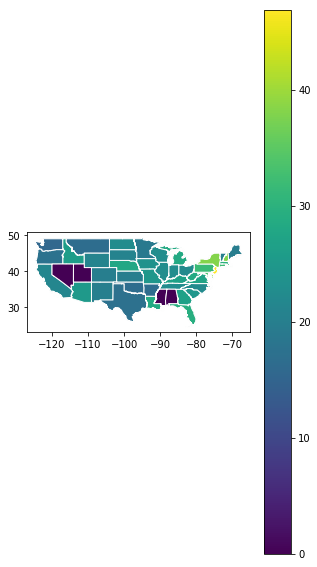

In [269]:
# just to collect legend

f, ax = plt.subplots(1, figsize=(5,10))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

ax.set_xlim([-127,-65])
ax.set_ylim([23,51])

states_map_pop.plot(ax=ax, linewidth=1, edgecolor='2', column='sales_per_capita',  cmap='viridis', legend=True)


In [154]:
from PIL import ImageDraw

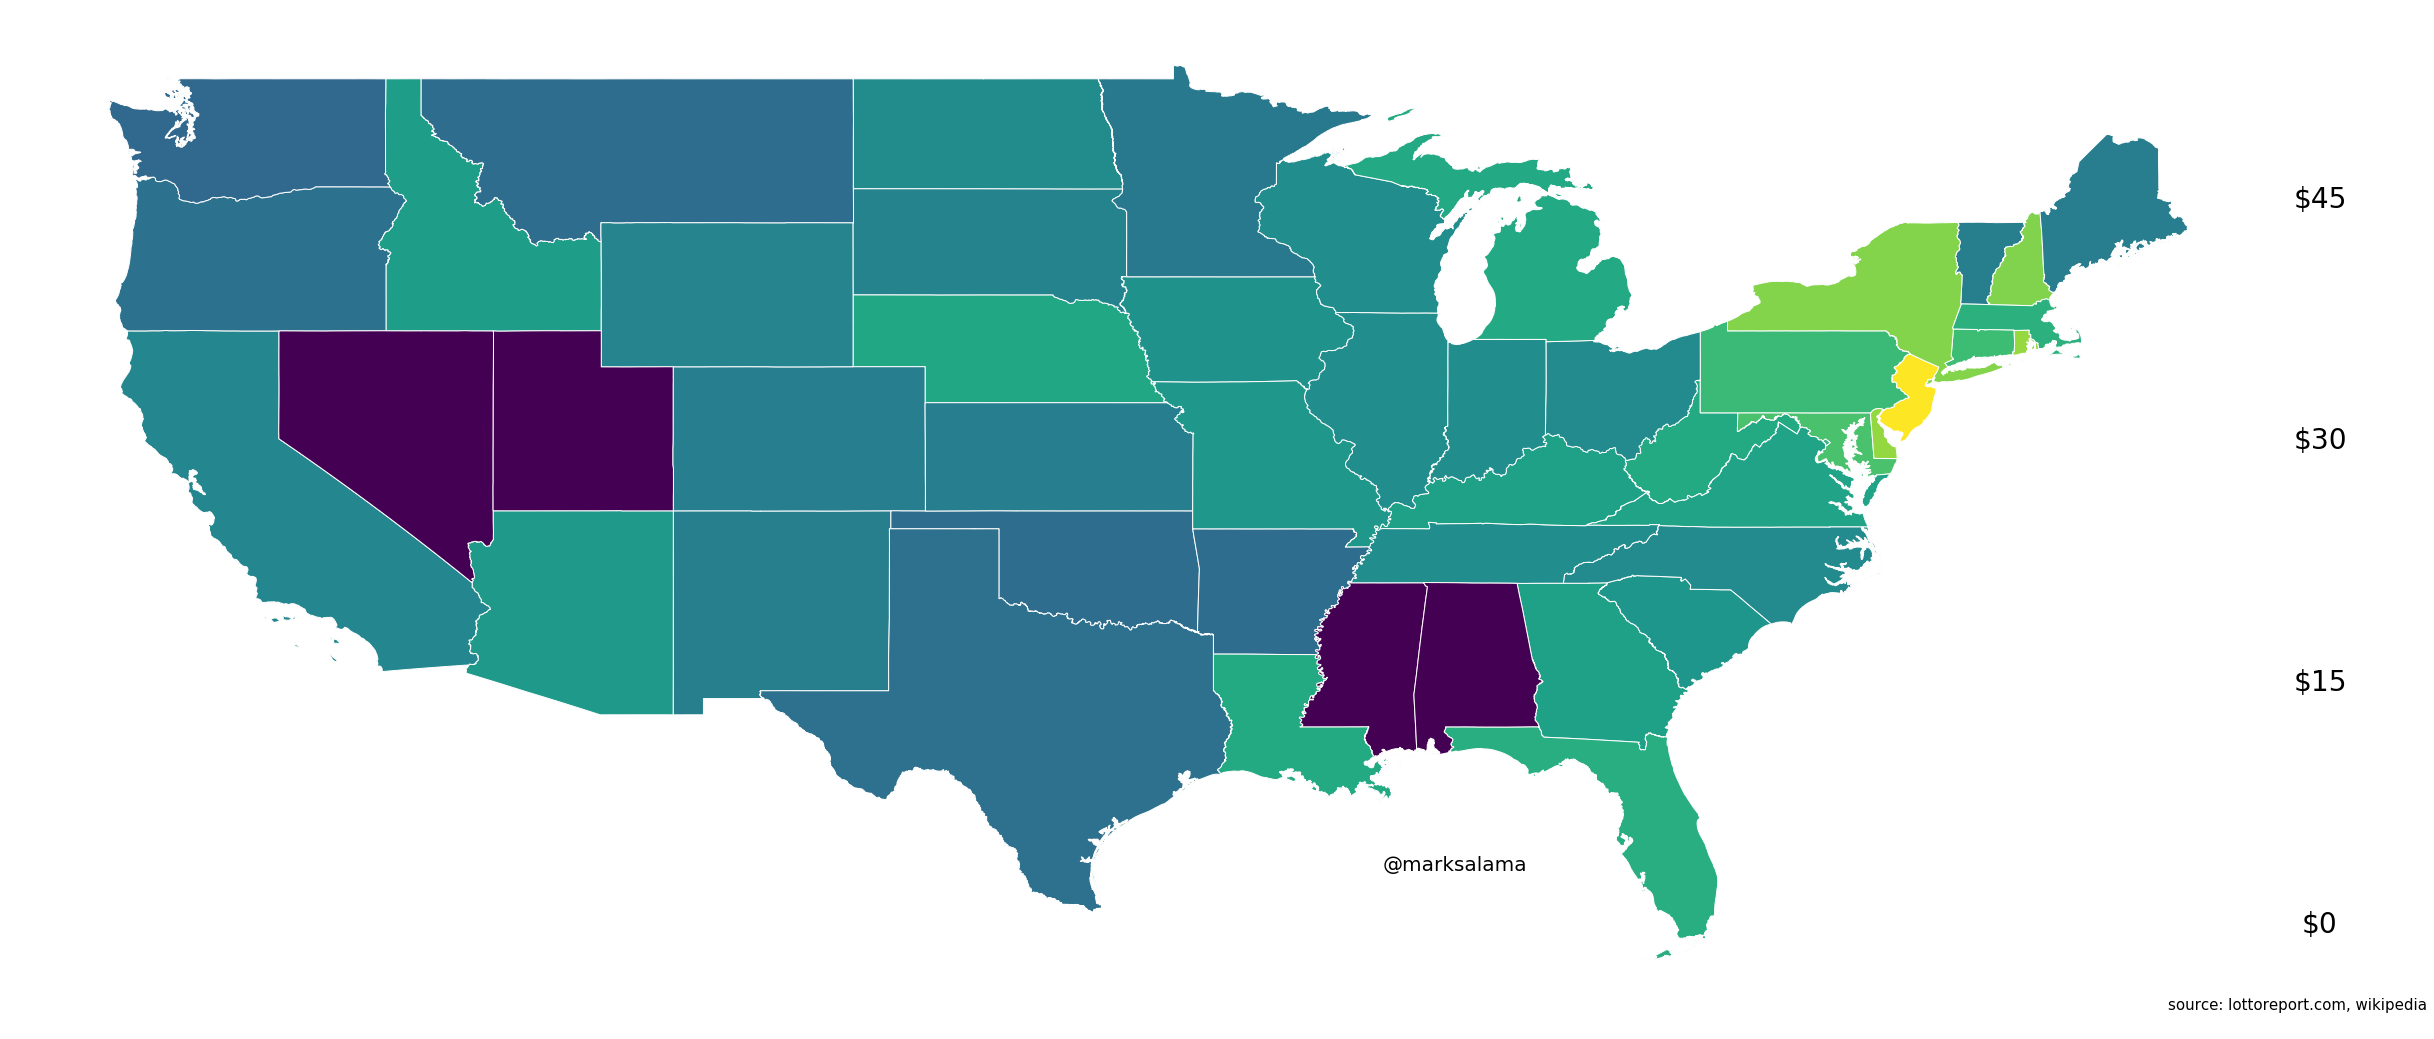

In [268]:
f, ax = plt.subplots(1, figsize=(40,40))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

ax.set_xlim([-127,-65])
ax.set_ylim([23,51])
ax.set_axis_off()

ax.annotate('@marksalama', xy=(1500,150), xycoords='axes points',
        size=20, ha='right', va='center')

ax.annotate('$45', xy=(2320,815), xycoords='axes points',
        size=28, ha='right', va='center')

ax.annotate('$30', xy=(2320,574), xycoords='axes points',
        size=28, ha='right', va='center')

ax.annotate('$15', xy=(2320,332), xycoords='axes points',
        size=28, ha='right', va='center')

ax.annotate('$0', xy=(2310,90), xycoords='axes points',
        size=28, ha='right', va='center')

ax.annotate('source: lottoreport.com, wikipedia', xy=(2400,10), xycoords='axes points',
        size=15, ha='right', va='center')

img = states_map_pop.plot(ax=ax, linewidth=1, edgecolor='2', column='sales_per_capita',  cmap='viridis')

img.get_figure().savefig('map.png')

img = Image.open("map.png")

legend = Image.open("legend.png") 

img.paste(legend, (2580, 1100))

w, h = img.size

img = img.crop((380, 700, w-100, h-920))

w, h = img.size

title = Image.open("title.png") 
w_title, h_title = title.size

img.paste(title, (int(w/2-w_title/2), 50))

img.save("final.png",format='PNG')